In [65]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt #Ploting charts
from glob import glob #retrieving an array of files in directories
from keras.models import Sequential #for neural network models
from keras.layers import Dense, Dropout, Flatten, ZeroPadding2D, Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator #Data augmentation and preprocessing
from keras.utils import to_categorical #For One-hot Encoding
from keras.optimizers import Adam, SGD, RMSprop #For Optimizing the Neural Network
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import cv2
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array


In [42]:
import os
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for file in os.listdir(path):
            photo = load_img(os.path.join(path, file), target_size = (150,150),color_mode='grayscale')
            photo = img_to_array(photo)
            data.append([photo,class_num])
    
    #data = np.asarray(data)
    return np.array(data)

In [43]:
train = get_training_data("../Pneumonia/chest_xray/train")
val = get_training_data("../Pneumonia/chest_xray/val")
test = get_training_data("../Pneumonia/chest_xray/test")

<ipython-input-42-a1c83f683d36>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(data)


In [7]:
'''import random
random.shuffle(train)
random.shuffle(test)'''


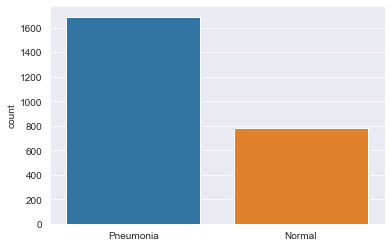

In [44]:
l=[]
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)       

Text(0.5, 1.0, 'NORMAL')

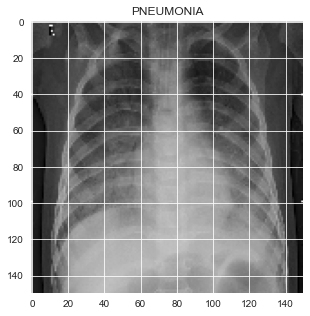

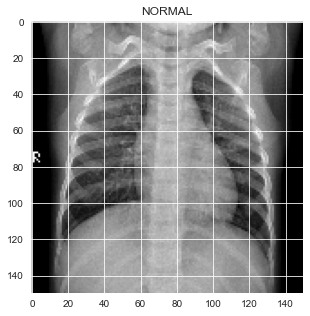

In [45]:
plt.figure(figsize = (5,5))
plt.imshow(np.reshape(train[0][0], (150, 150)), cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(np.reshape(train[-1][0], (150, 150)), cmap='gray')
plt.title(labels[train[-1][1]])

In [46]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for img, label in train:
    x_train.append(img)
    y_train.append(label)

for img, label in test:
    x_test.append(img)
    y_test.append(label)
    
for img, label in val:
    x_val.append(img)
    y_val.append(label)

In [47]:
# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [48]:
# resize data for deep learning 
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)




In [49]:
print(len(x_train))
print(len(x_val))
print(len(x_test))

2468
16
624


In [56]:
datagen = ImageDataGenerator(    
    rotation_range = 30,  
    zoom_range = 0.2, 
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip = True) 

'''train_datagen = datagen.flow(x_train,y_train,batch_size=64)
val_datagen = datagen.flow(x_val,y_val,batch_size=8)
train_step_size = len(x_train)//64
val_step_size = len(x_val)//8'''

'train_datagen = datagen.flow(x_train,y_train,batch_size=64)\nval_datagen = datagen.flow(x_val,y_val,batch_size=8)\ntrain_step_size = len(x_train)//64\nval_step_size = len(x_val)//8'

In [66]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape = (150,150,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu',input_shape = (150,150,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape = (150,150,1)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu',input_shape = (150,150,1)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape = (150,150,1)))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
#model.add(Dropout(0.25))
model.add(Dense(1,activation='sigmoid'))


In [67]:
from keras import metrics
optimizer = Adam(lr = 0.0001)
#early_stopping_monitor = EarlyStopping(patience = 3, monitor = "val_acc", mode="max", verbose = 2)
model.compile(optimizer = 'adam',loss="binary_crossentropy", metrics=['acc',metrics.Recall(),metrics.Precision()])



In [68]:
history = model.fit(datagen.flow(x_train,y_train,batch_size=64),epochs = 10 ,validation_data=datagen.flow(x_val,y_val,batch_size=8))

Epoch 1/10
39/39 [==============================] - 68s 2s/step - loss: 0.6425 - acc: 0.6795 - recall_9: 0.0334 - precision_9: 0.4062 - val_loss: 0.7315 - val_acc: 0.5000 - val_recall_9: 0.0000e+00 - val_precision_9: 0.0000e+00
Epoch 2/10
39/39 [==============================] - 69s 2s/step - loss: 0.6033 - acc: 0.6921 - recall_9: 0.0411 - precision_9: 0.7111 - val_loss: 0.7370 - val_acc: 0.5625 - val_recall_9: 1.0000 - val_precision_9: 0.5333
Epoch 3/10
39/39 [==============================] - 69s 2s/step - loss: 0.4997 - acc: 0.7686 - recall_9: 0.5276 - precision_9: 0.6694 - val_loss: 0.8068 - val_acc: 0.5000 - val_recall_9: 0.0000e+00 - val_precision_9: 0.0000e+00
Epoch 4/10
39/39 [==============================] - 69s 2s/step - loss: 0.3841 - acc: 0.8282 - recall_9: 0.6778 - precision_9: 0.7532 - val_loss: 0.5304 - val_acc: 0.7500 - val_recall_9: 0.7500 - val_precision_9: 0.7500
Epoch 5/10
39/39 [==============================] - 71s 2s/step - loss: 0.3297 - acc: 0.8505 - recall_9:

In [55]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 3s 132ms/step - loss: 0.4598 - acc: 0.7885 - recall_6: 0.5214 - precision_6: 0.8592
Loss of the model is -  45.97671627998352 %
20/20 [==============================] - 3s 130ms/step - loss: 0.4598 - acc: 0.7885 - recall_6: 0.5214 - precision_6: 0.8592
Accuracy of the model is -  78.84615659713745 %


In [72]:
#model.save('model2.h5')

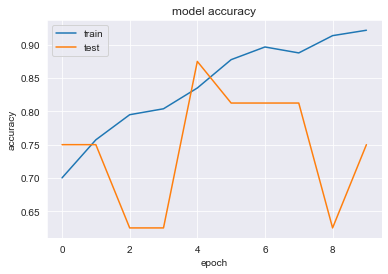

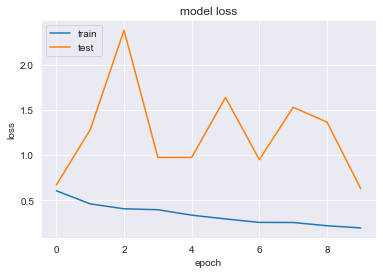

In [73]:
import matplotlib.pyplot as plt

#acc
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [82]:
predictions = (model.predict(x_test) > 0.5).astype("int32")
predictions = predictions.reshape(1,-1)[0]
#print(predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 0 0 1 1 1 1 1 0 1 

In [79]:
print(classification_report(y_test, predictions, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.89      0.94      0.91       390
   Normal (Class 1)       0.89      0.80      0.84       234

           accuracy                           0.89       624
          macro avg       0.89      0.87      0.88       624
       weighted avg       0.89      0.89      0.89       624



In [80]:
cm = confusion_matrix(y_test,predictions)
print(cm)

[[367  23]
 [ 46 188]]
